# Q.1

Split into training and test datasets
In this task, you will split your dataset into training and test groups
Instructions
Load data using path as argument inside .read_csv() method of pandas and save it as df
Split df into features X and target y using .iloc[]. Keep in mind you have features as the first 7 columns and the last column as target
Then split into training and test features and target using train_test_split(X, y, test_size, random_state) with test_size=0.2 and random_state=2 and save them as X_train, X_test, y_train and y_test
Print out X_train and X_test to have a glimpse of the data


In [7]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Code starts here
path="eda_data.csv"
df=pd.read_csv(path)
X=df.iloc[:,:7]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
df
# code ends here


,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType,SalePrice
0,65.0,NaN,856,1710,8450,Normal,Attchd,208500
1,80.0,NaN,1262,1262,9600,Normal,Attchd,181500
2,68.0,NaN,920,1786,11250,Normal,Attchd,223500
3,60.0,NaN,756,1717,9550,Abnorml,Detchd,140000
4,84.0,NaN,1145,2198,14260,Normal,Attchd,250000
...,...,...,...,...,...,...,...,...
1455,62.0,NaN,953,1647,7917,Normal,Attchd,175000
1456,85.0,NaN,1542,2073,13175,Normal,Attchd,210000
1457,66.0,NaN,1152,2340,9042,Normal,Attchd,266500
1458,68.0,NaN,1078,1078,9717,Normal,Attchd,142125


In [8]:
X_train

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,NaN,1242,1242,9600,Normal,Attchd
863,70.0,NaN,1148,1148,7931,Normal,Attchd
504,24.0,NaN,855,1322,2308,Normal,Attchd
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd
1389,60.0,NaN,735,1218,6000,Normal,Detchd
...,...,...,...,...,...,...,...
466,85.0,NaN,1277,1277,10628,Normal,Attchd
299,80.0,NaN,1092,1152,14000,Family,Attchd
493,70.0,NaN,1269,1269,7931,Normal,Detchd
527,67.0,NaN,1452,2713,14948,Partial,Attchd


In [9]:
y_train

455     175500
863     132500
504     147000
1413    257000
1389    131000
         ...  
466     167000
299     158500
493     155000
527     446261
1192    125000
Name: SalePrice, Length: 1168, dtype: int64

Lets plot out SalePrice against GrLivArea to look out for abnormal houses. The code snippet is shown below:

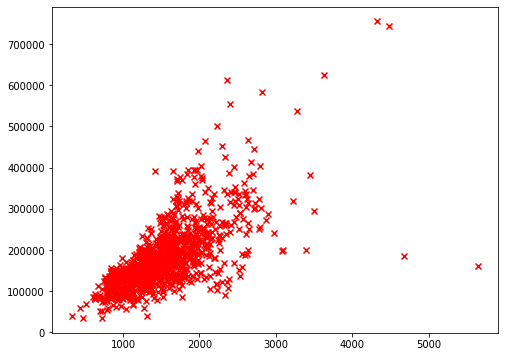

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train['GrLivArea'], y_train, color='red', marker='x')
plt.show()


Let's look at the Pythonic implementation for outliers. We have made a function outliers_zscore to calculate Z-score.


In [11]:
# Function to calculate outliers with Z-score
def outliers_zscore(data, column):
    # threshold above 3 standard deviations
    threshold = 3
    # mean and standard deviation
    mean, std = np.mean(data[column]), np.std(data[column])
    # Z-scores
    zscores = [(y_i - mean) / std for y_i in data[column]]
    # Index for outliers
    idx = np.where(np.array(zscores) > threshold)[0]
    outlier =  data[column].iloc[idx]
    return outlier


Applying outliers_zscore() on GrLivArea gives us the following data points (index values for GrLivArea) as output.


In [12]:
print(outliers_zscore(X_train['GrLivArea']))


TypeError: outliers_zscore() missing 1 required positional argument: 'column'

Capping methods: These methods take advantage of the concept of percentiles to segregate outliers. A typical example is excluding data points which are in the lower 5 percentile and the upper 5 percentile i.e. values lying outside the range of 5th and 95th percentile can be considered an outlier.
A Pythonic implementation is shown below:


In [13]:
# Function to detect outliers with percentiles
def percentile(column, data):
    # Upper and Lower range values 
    lower, upper = data[column].quantile([0.05, 0.95]).values
    # Getting rows which fall within the specified range
    lower_values, upper_values = data[data[column] < lower][column].values, data[data[column] > upper][column].values
    # Join all the outlier rows
    outlier = np.concatenate([lower_values, upper_values], axis=0) 
    return outlier 

print(percentile('GrLivArea', X_train))


[ 840  792  672  816  720  816  480  784  630  796  764  789  816  816
  694  729  754  789  768  790  720  630  520  708  438  752  816  832
  691  803  841  833  788  630  784  780  816  800  796  334  720  773
  835  845  816  747  825  693  630  605  768  630  813  774  816 5642
 2654 4316 2784 2599 2643 2872 4676 2622 2555 2810 3086 2526 2730 2468
 2526 4476 2792 2612 2614 2794 3447 2715 2620 2822 2521 2554 3493 3627
 2630 2633 2576 2704 2482 2466 2668 2519 3082 2696 2601 2462 2640 3222
 2775 2504 2514 2596 2727 2574 3279 2520 2898 2634 3395 2978 2531 2610
 2713]


# Q.2
PRACTICE

Detect Outlier
In this task, you will detect outliers for the columns with continuous data i.e. the columns 'LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea' by drawing a scatter plot for each of these features against the target variable SalePrice. This task will give you a visual understanding of the abnormalities of these features
Instructions
Initialize 4 axes ax_1, ax_2, ax_3, ax_4 and a figure fig using .subplots() with 2 rows and 2 columns
Use .scatter() on ax_1 to generate a scatter plot between LotFrontage from X_train (use X_train['LotFrontage']) with red color by passing color='red'
Set its title as SalePrice vs LotFrontage, X-axis label as LotFrontage and Y-axis label as 'SalePrice'
Similarly draw the other 3 scatter plots for the remaining features (given in the task description above) with colors blue, green and black. Set their titles as Feature vs Sale Price, X-axis label as Feature and Y-axis label as SalePrice where Feature is the name of the feature


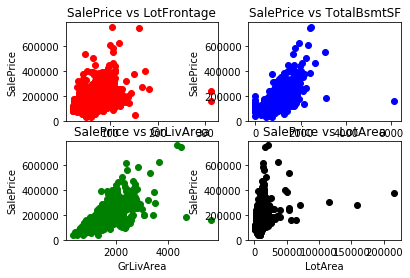

In [14]:
import matplotlib.pyplot as plt

fig, ((ax_1, ax_2),(ax_3, ax_4)) = plt.subplots(2, 2)

ax_1.scatter(X_train['LotFrontage'],y_train, color='red')
ax_1.set_title('SalePrice vs LotFrontage')
ax_1.set_xlabel('LotFrontage')
ax_1.set_ylabel('SalePrice')

ax_2.scatter(X_train['TotalBsmtSF'],y_train, color='blue')
ax_2.set_title("SalePrice vs TotalBsmtSF")
ax_2.set_xlabel("TotalBsmtSF")
ax_2.set_ylabel("SalePrice")

ax_3.scatter(X_train['GrLivArea'],y_train, color='green')
ax_3.set_title("SalePrice vs GrLivArea")
ax_3.set_xlabel("GrLivArea")
ax_3.set_ylabel("SalePrice")

ax_4.scatter(X_train['LotArea'],y_train, color='black')
ax_4.set_title("SalePrice vs LotArea")
ax_4.set_xlabel("LotArea")
ax_4.set_ylabel("SalePrice")
plt.show()


# Q.3
PRACTICE
Out LIERS!
Instructions
Use pd.concat([X_train, y_train], axis=1) to concatenate the training features and target vertically. You are doing this step so that the instances get deleted together for both features and targets. Save it as train
On LotFrontage from train dataframe, select values which are less than 300 and save as mask1
On TotalBsmtSF from train dataframe, select values less than 5000 and save as mask2
On GrLivArea from train dataframe, select values less than 4500 and save as mask3
On LotArea from train dataframe, select values less than 100000 and save as mask4
Apply these 4 masks on train using & operator and save it as train



In [15]:
train=pd.concat([X_train, y_train], axis=1) 
mask1=train['LotFrontage']<300
mask2=train["TotalBsmtSF"]<5000
mask3=train["GrLivArea"]<4500
mask4=train["LotArea"]<100000
train=train[mask1 & mask2 & mask3 & mask4]

train

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType,SalePrice
455,80.0,NaN,1242,1242,9600,Normal,Attchd,175500
863,70.0,NaN,1148,1148,7931,Normal,Attchd,132500
504,24.0,NaN,855,1322,2308,Normal,Attchd,147000
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd,257000
1389,60.0,NaN,735,1218,6000,Normal,Detchd,131000
...,...,...,...,...,...,...,...,...
466,85.0,NaN,1277,1277,10628,Normal,Attchd,167000
299,80.0,NaN,1092,1152,14000,Family,Attchd,158500
493,70.0,NaN,1269,1269,7931,Normal,Detchd,155000
527,67.0,NaN,1452,2713,14948,Partial,Attchd,446261


Now that you have dealt with outliers in your training data lets look at the percentage of missing values in train. The code snippet is:


In [16]:
# Percentage of missing values in every feature
for column in train.columns:
    print("Percentage of missing values in {} is: {}".format(column, (train[column].isnull().sum()*100)/len(train)))


Percentage of missing values in LotFrontage is: 0.0
Percentage of missing values in PoolQC is: 99.5846313603323
Percentage of missing values in TotalBsmtSF is: 0.0
Percentage of missing values in GrLivArea is: 0.0
Percentage of missing values in LotArea is: 0.0
Percentage of missing values in SaleCondition is: 0.0
Percentage of missing values in GarageType is: 6.334371754932502
Percentage of missing values in SalePrice is: 0.0


.info(): This method gives us information about the number of non-null entries per column/feature, the data type of every feature and the memory used by the dataframe. The below image shows this method applied to X_train


In [17]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 455 to 1192
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    967 non-null    float64
 1   PoolQC         5 non-null      object 
 2   TotalBsmtSF    1168 non-null   int64  
 3   GrLivArea      1168 non-null   int64  
 4   LotArea        1168 non-null   int64  
 5   SaleCondition  1168 non-null   object 
 6   GarageType     1103 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 73.0+ KB


.isnull().sum(): This method gives the number of missing values per column/feature. Below figure shows this method applied on X_train


In [18]:
X_train.isnull().sum()

LotFrontage       201
PoolQC           1163
TotalBsmtSF         0
GrLivArea           0
LotArea             0
SaleCondition       0
GarageType         65
dtype: int64

.notnull().sum(): As the name suggests this method gives the number of non-missing or valid values per column/feature. Here, valid values means data points other than type None or NaN. It can be considered as the exact reverse of what .isnull().sum() calculated.


In [19]:
X_train.notnull().sum()

LotFrontage       967
PoolQC              5
TotalBsmtSF      1168
GrLivArea        1168
LotArea          1168
SaleCondition    1168
GarageType       1103
dtype: int64

# Q.4
PRACTICE
Identify percentage of missing values
Instructions
The dataset has been split for you into X_train and y_train; you will be taking the help of them for further operations
Create a variable missing_columns where you apply .isnull().sum() and calculate the percentage of missing values for every feature by dividing every value by len(X_train) and multiplying by 100.
Your columns of interest are those which contain more than 50% missing values; so you will create a Boolean condition mask which tests if every value in missing_columns is greater than 50. Use Boolean indexing to achieve this step
Now time to extract columns which have more than 50 missing values; you can do it by applying the Boolean condition mask on missing_columns and apply .index.tolist() at its end to extract out the required column names. Store it as columns and print it out
To calculate the percentage of rows with more than 5 missing entries, (1 - (len(X_train.dropna(thresh=5)) / len(X_train)))*100and save it as rows_percentage. Print it out


In [20]:
missing_col=X_train.isnull().sum()
missing_col

LotFrontage       201
PoolQC           1163
TotalBsmtSF         0
GrLivArea           0
LotArea             0
SaleCondition       0
GarageType         65
dtype: int64

In [21]:
missing_columns=((X_train.isnull().sum())/len(X_train))*100 # calculating percentage
missing_columns

LotFrontage      17.208904
PoolQC           99.571918
TotalBsmtSF       0.000000
GrLivArea         0.000000
LotArea           0.000000
SaleCondition     0.000000
GarageType        5.565068
dtype: float64

In [22]:
mask=missing_columns>50
mask

LotFrontage      False
PoolQC            True
TotalBsmtSF      False
GrLivArea        False
LotArea          False
SaleCondition    False
GarageType       False
dtype: bool

In [23]:
columns=missing_col[mask].index.tolist()   #imp applyimng a mask on columns
columns

['PoolQC']

In [24]:
rows_percentage = (1 - (len(X_train.dropna(thresh=5)) / len(X_train)))*100
rows_percentage

0.3424657534246589

In [25]:
X_train

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,NaN,1242,1242,9600,Normal,Attchd
863,70.0,NaN,1148,1148,7931,Normal,Attchd
504,24.0,NaN,855,1322,2308,Normal,Attchd
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd
1389,60.0,NaN,735,1218,6000,Normal,Detchd
...,...,...,...,...,...,...,...
466,85.0,NaN,1277,1277,10628,Normal,Attchd
299,80.0,NaN,1092,1152,14000,Family,Attchd
493,70.0,NaN,1269,1269,7931,Normal,Detchd
527,67.0,NaN,1452,2713,14948,Partial,Attchd


# Q.5
PRACTICE

Treat missing values
Instructions
Drop the column PoolQC from X_train and X_test using .drop() method. Don't forget to use axis=1 argument inside it
An imputer for continuous data by mean values has been defined for you mean_imputer. Similarly another imputer mode_imputer for catgeorical data is predefined.
Fit mode_imputer data on X_train[['GarageType']] and then use it to transform both X_train[['GarageType']] and X_test[['GarageType']] Example of transformation:
X_train['GarageType'] = mode_imputer.transform(X_train[['GarageType']])
 
Fit mean_imputer on X_train[['LotFrontage']] and transform on both X_train[['LotFrontage']] and X_test[['LotFrontage']]. While transforming retain the original variable names. Example of transformation:
X_train['LotFrontage'] = mean_imputer.transform(X_train[['LotFrontage']])


In [26]:
# Import packages
from sklearn.impute import SimpleImputer as Imputer
dict_new = {'Attchd':0,'Detchd':1,'BuiltIn':2,'2Types':3,'CarPort':4,'Basment':5}
X_train['GarageType'] = X_train['GarageType'].map(dict_new)
X_test['GarageType'] = X_test['GarageType'].map(dict_new)
X_train

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,NaN,1242,1242,9600,Normal,0.0
863,70.0,NaN,1148,1148,7931,Normal,0.0
504,24.0,NaN,855,1322,2308,Normal,0.0
1413,88.0,NaN,1844,1844,10994,Abnorml,0.0
1389,60.0,NaN,735,1218,6000,Normal,1.0
...,...,...,...,...,...,...,...
466,85.0,NaN,1277,1277,10628,Normal,0.0
299,80.0,NaN,1092,1152,14000,Family,0.0
493,70.0,NaN,1269,1269,7931,Normal,1.0
527,67.0,NaN,1452,2713,14948,Partial,0.0


In [27]:
# Custom imputers
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')


In [28]:
X_train.drop(["PoolQC"],axis=1,inplace=True)
X_test.drop(["PoolQC"],axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
mode_imputer=mode_imputer.fit(X_train[['GarageType']])
X_train['GarageType'] = mode_imputer.transform(X_train[['GarageType']])
X_test['GarageType']=mode_imputer.transform(X_test[['GarageType']])


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
X_train

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,1242,1242,9600,Normal,0.0
863,70.0,1148,1148,7931,Normal,0.0
504,24.0,855,1322,2308,Normal,0.0
1413,88.0,1844,1844,10994,Abnorml,0.0
1389,60.0,735,1218,6000,Normal,1.0
...,...,...,...,...,...,...
466,85.0,1277,1277,10628,Normal,0.0
299,80.0,1092,1152,14000,Family,0.0
493,70.0,1269,1269,7931,Normal,1.0
527,67.0,1452,2713,14948,Partial,0.0


In [31]:
mean_imputer=mean_imputer.fit(X_train[['LotFrontage']])
X_train['LotFrontage'] = mean_imputer.transform(X_train[['LotFrontage']])
X_test['LotFrontage'] = mean_imputer.transform(X_test[['LotFrontage']])


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Q.6
PRACTICE

Eliminate skewness from `SalePrice`
Instructions
Apply logarithmic transformation using np.log() on y_train and save it as y_train
Using sns.distplot() method of seaborn, visualize its distribution to check if y_train is now approximately normally distributed


In [32]:
y_train

455     175500
863     132500
504     147000
1413    257000
1389    131000
         ...  
466     167000
299     158500
493     155000
527     446261
1192    125000
Name: SalePrice, Length: 1168, dtype: int64

Text(0.5, 1.0, 'Saleprice histogram')

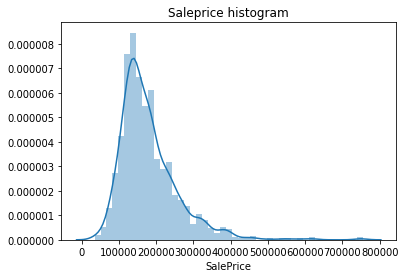

In [33]:
import seaborn as sns

x=sns.distplot(y_train)
x.set_title('Saleprice histogram')# it is right skewed

Text(0.5, 1.0, 'Saleprice after removing skewness')

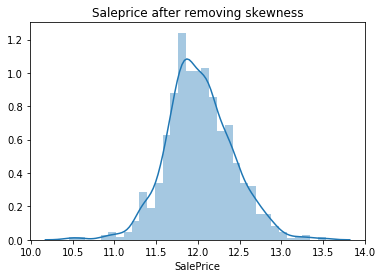

In [34]:
y_train=np.log(y_train)
x1=sns.distplot(y_train)
x1.set_title('Saleprice after removing skewness')

# Q.7
PRACTICE
Scale your numerical features
Instructions
Initialize a scaler object normalizer by assigning it to MinMaxScaler which will set values for continuous features in the range [0,1]
Fit normalizer object on the numerical columns given by num_columns of X_train using .fit() method
Transform using .transform() on the same set of columns for X_train and X_test. Store the transformed values in the same object. A sample transformation is shown below
X_train[columns] = scaler.transform(X_train[columns])
 
Print out the first five rows of X_train and X_test to see the difference


In [35]:
X_train

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,1242,1242,9600,Normal,0.0
863,70.0,1148,1148,7931,Normal,0.0
504,24.0,855,1322,2308,Normal,0.0
1413,88.0,1844,1844,10994,Abnorml,0.0
1389,60.0,735,1218,6000,Normal,1.0
...,...,...,...,...,...,...
466,85.0,1277,1277,10628,Normal,0.0
299,80.0,1092,1152,14000,Family,0.0
493,70.0,1269,1269,7931,Normal,1.0
527,67.0,1452,2713,14948,Partial,0.0


In [36]:
num_columns=X_train.select_dtypes(include=np.number).columns.tolist()# to find columns with only numeric values
num_columns

['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea', 'GarageType']

In [37]:
# Import packages
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
scaler = MinMaxScaler()

# Fit on training data with columns of interest
scaler.fit(X_train[num_columns])

# Transform on training data with columns of interest
X_train[num_columns] = scaler.transform(X_train[num_columns])

# Transform on test data with columns of interest
X_test[num_columns] = scaler.transform(X_test[num_columns])    


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [38]:
X_train

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.202055,0.203273,0.171063,0.037999,Normal,0.0
863,0.167808,0.187889,0.153353,0.030192,Normal,0.0
504,0.010274,0.139935,0.186134,0.003887,Normal,0.0
1413,0.229452,0.301800,0.284476,0.044520,Abnorml,0.0
1389,0.133562,0.120295,0.166541,0.021158,Normal,0.2
...,...,...,...,...,...,...
466,0.219178,0.209002,0.177656,0.042808,Normal,0.0
299,0.202055,0.178723,0.154107,0.058582,Family,0.0
493,0.167808,0.207692,0.176149,0.030192,Normal,0.2
527,0.157534,0.237643,0.448191,0.063017,Partial,0.0


In [39]:
X_test

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
503,0.270548,0.245663,0.276375,0.066076,Normal,0.0
101,0.191781,0.121277,0.263376,0.036156,Normal,0.0
608,0.195205,0.157938,0.538809,0.050012,Alloca,1.0
1089,0.054795,0.204092,0.172005,0.008603,Normal,0.0
819,0.078767,0.222259,0.192916,0.022894,Partial,0.0
...,...,...,...,...,...,...
816,0.168088,0.164975,0.126978,0.046536,Normal,0.0
1273,0.352740,0.166776,0.192728,0.046943,Normal,1.0
285,0.047945,0.102291,0.172570,0.012977,Partial,0.2
194,0.133562,0.141408,0.099849,0.026678,Normal,0.2


# Q.8
Encode categorical features `SaleCondition` and `GarageType`
Instructions
Initialize label encoer object label_encoder using LabelEncoder() which has been imported for you
Fit and transform SaleCondition feature using label_encoder. .fit_transform() method on both X_train and X_test. Take help from code snippets given in the tutorial if you get stuck
Then use One-Hot Encoding to encode GarageType using .get_dummies() on X_train and X_test and save them as x_train and x_test
Print out first five rows of x_train and x_test


In [40]:
X_train

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.202055,0.203273,0.171063,0.037999,Normal,0.0
863,0.167808,0.187889,0.153353,0.030192,Normal,0.0
504,0.010274,0.139935,0.186134,0.003887,Normal,0.0
1413,0.229452,0.301800,0.284476,0.044520,Abnorml,0.0
1389,0.133562,0.120295,0.166541,0.021158,Normal,0.2
...,...,...,...,...,...,...
466,0.219178,0.209002,0.177656,0.042808,Normal,0.0
299,0.202055,0.178723,0.154107,0.058582,Family,0.0
493,0.167808,0.207692,0.176149,0.030192,Normal,0.2
527,0.157534,0.237643,0.448191,0.063017,Partial,0.0


In [41]:
unique_values = np. unique(X_train['SaleCondition'] )
unique_values

array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)

In [43]:
# Import packages
from sklearn.preprocessing import LabelEncoder

# Initialize encoder object
encoder = LabelEncoder()

# Fit-transform on data
X_train['SaleCondition'] = encoder.fit_transform(X_train['SaleCondition'])
X_test['SaleCondition'] = encoder.fit_transform(X_test['SaleCondition'])

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [44]:
X_train

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.202055,0.203273,0.171063,0.037999,4,0.0
863,0.167808,0.187889,0.153353,0.030192,4,0.0
504,0.010274,0.139935,0.186134,0.003887,4,0.0
1413,0.229452,0.301800,0.284476,0.044520,0,0.0
1389,0.133562,0.120295,0.166541,0.021158,4,0.2
...,...,...,...,...,...,...
466,0.219178,0.209002,0.177656,0.042808,4,0.0
299,0.202055,0.178723,0.154107,0.058582,3,0.0
493,0.167808,0.207692,0.176149,0.030192,4,0.2
527,0.157534,0.237643,0.448191,0.063017,5,0.0


In [45]:
# OHE by get dummies
x_train = pd.get_dummies(X_train)
x_test = pd.get_dummies(X_test)


In [46]:
x_train.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,0.202055,0.203273,0.171063,0.037999,4,0.0
863,0.167808,0.187889,0.153353,0.030192,4,0.0
504,0.010274,0.139935,0.186134,0.003887,4,0.0
1413,0.229452,0.301800,0.284476,0.044520,0,0.0
1389,0.133562,0.120295,0.166541,0.021158,4,0.2


In [47]:
x_test.head()

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
503,0.270548,0.245663,0.276375,0.066076,3,0.0
101,0.191781,0.121277,0.263376,0.036156,3,0.0
608,0.195205,0.157938,0.538809,0.050012,1,1.0
1089,0.054795,0.204092,0.172005,0.008603,3,0.0
819,0.078767,0.222259,0.192916,0.022894,4,0.0


Quiz : Data Transformation

QUESTION 1 OF 2
Right Skewed data can be corrected by using which of the following methods?
Logarithmic transformation
Higher power transformation
Reciprocal transformation
a and c

QUESTION 2 OF 2
Is categorical encoding required before applying a linear regression model?
TRUE
FALSE
